In [4]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helper import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### FashionMNIST dataset
The Fashion MNIST dataset is loaded.

In [9]:
trainset = datasets.FashionMNIST('', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('', download=True, train=False, transform=transform)

0%|          | 0/26421880 [00:00<?, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte.gz
26427392it [00:00, 51234337.61it/s]
Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw
32768it [00:00, 723427.64it/s]
  2%|▏         | 106496/4422102 [00:00<00:04, 1003986.48it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw
4423680it [00:00, 26859050.17it/s]
8192it [00:00, 213888.80it/s]
Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw
Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw
Processing...
  8%|▊         | 2187264/26421880 [00:00<00:01, 21732966.33it/s]Done!
26427392it [00:00, 93308569.89it/s]
Extracting PATH_TO_STORE_TESTSET/FashionMNIST/raw/train-i

In [10]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# LBFGS mini-batch hyperparameters tuning 



In [7]:
minibatch_size_grid=[32,64]
max_iter = 3
history_size_grid=[10,20]

In [8]:
epochs = 15

In [11]:
minibatch_size_grid = [2048,4096]#[512,1024]
max_iter=20
epochs=30
history_size_grid=[10,20]

In [12]:
training_loss_fcnn2, test_loss_fcnn2,training_accuracy_fcnn2, test_accuracy_fcnn2, time_fcnn2 = hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid,epochs,"FCNN2", max_iter)

mages Tested = 10000
Model Accuracy = 0.8616
Number Of Images Tested = 60000
Model Accuracy = 0.9042333333333333
Test loss: 0.4348327100276947 

Epoch 20
Training loss: 0.14498490417997043
Number Of Images Tested = 10000
Model Accuracy = 0.8565
Number Of Images Tested = 60000
Model Accuracy = 0.89195
Test loss: 0.46685423254966735 

Epoch 21
Training loss: 0.14002791208525497
Number Of Images Tested = 10000
Model Accuracy = 0.8668
Number Of Images Tested = 60000
Model Accuracy = 0.9091666666666667
Test loss: 0.42222806215286257 

Epoch 22
Training loss: 0.13524567286173503
Number Of Images Tested = 10000
Model Accuracy = 0.8656
Number Of Images Tested = 60000
Model Accuracy = 0.9057166666666666
Test loss: 0.4395651280879974 

Epoch 23
Training loss: 0.13374041294058164
Number Of Images Tested = 10000
Model Accuracy = 0.8732
Number Of Images Tested = 60000
Model Accuracy = 0.9189833333333334
Test loss: 0.4047696113586426 

Epoch 24
Training loss: 0.1311816720912854
Number Of Images Test

In [13]:
np.savetxt('Fashion_LBFGS_minibatch_CNN_trainloss.txt', training_loss_fcnn2)
np.savetxt('Fashion_LBFGS_minibatch_CNN_testloss.txt', test_loss_fcnn2)
np.savetxt('Fashion_LBFGS_minibatch_CNN_trainacc.txt', training_accuracy_fcnn2)
np.savetxt('Fashion_LBFGS_minibatch_CNN_testacc.txt', test_accuracy_fcnn2)
np.savetxt('Fashion_LBFGS_minibatch_CNN_times.txt',time_fcnn2)

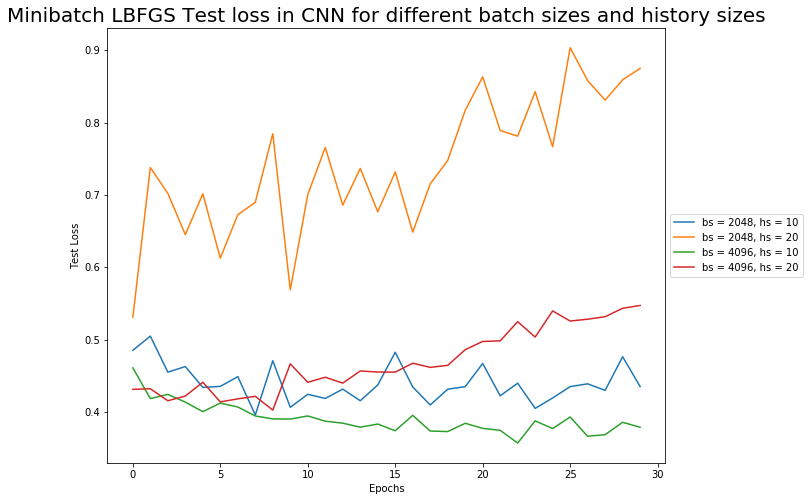

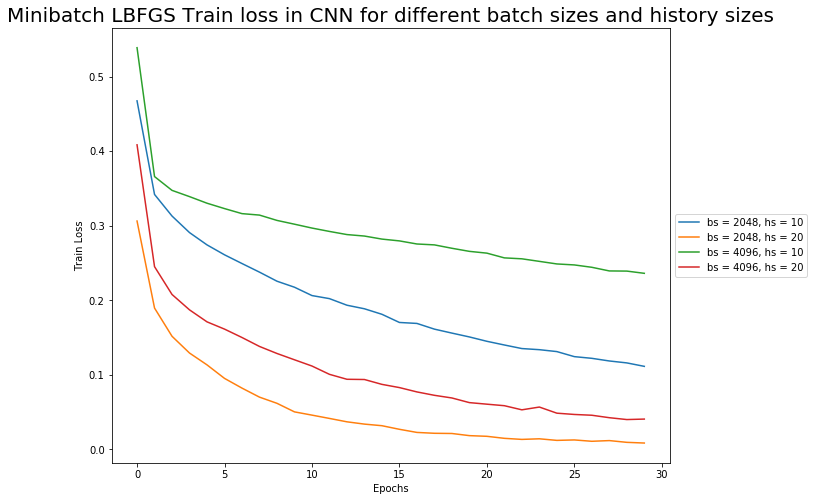

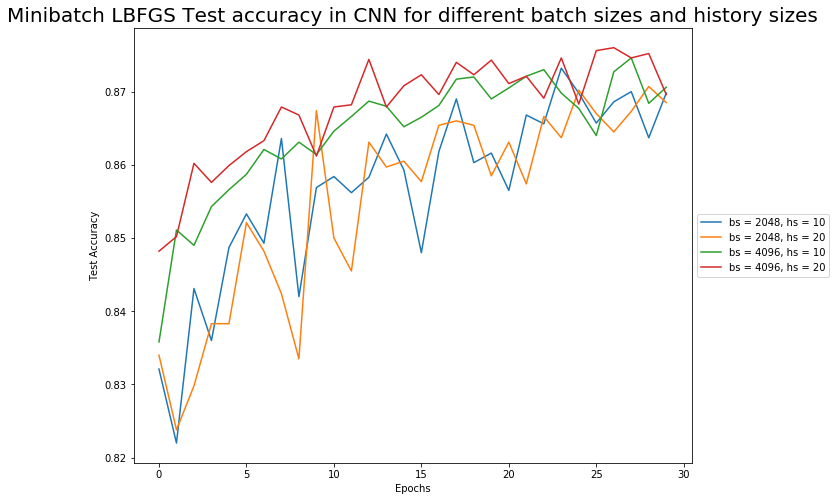

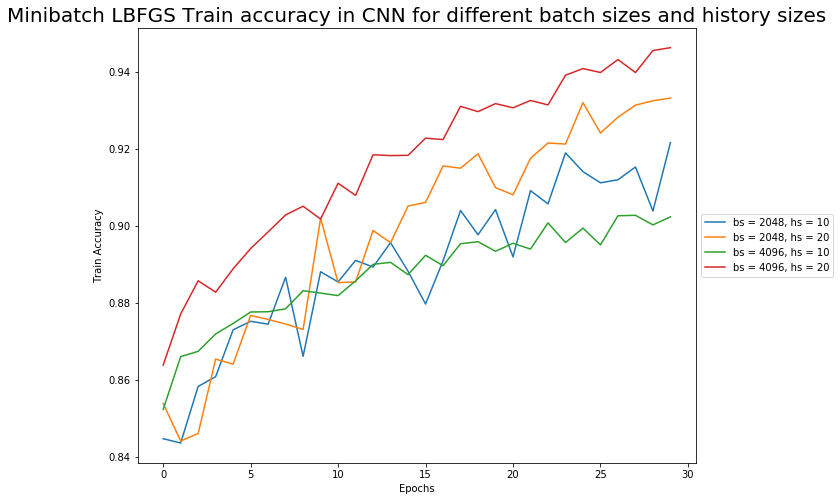

In [14]:
i = 0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (10,8))
        plt.plot(test_loss_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (10,8))
        plt.plot(training_loss_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (10,8))
        plt.plot(test_accuracy_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (10,8))
        plt.plot(training_accuracy_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        i+=1

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_minibatch_CNN_test_loss.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_minibatch_CNN_train_loss.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_minibatch_CNN_test_acc.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in CNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Fashion_LBFGS_minibatch_CNN_train_acc.jpg")